In [1]:
# Set default configurations

# See: lot/landmapper/reports.get_property_report()

from django.contrib.gis.geos import GEOSGeometry
import numpy as np
from matplotlib import patches
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
import shapely
import shapely.geometry
import requests
from PIL import Image
from io import BytesIO
import json
from rasterio.plot import show, reshape_as_raster, reshape_as_image
import geopandas as gpd
from rasterio import transform


geom_string = '''
    { 
        "type": "MultiPolygon", 
        "coordinates": [ [ [ [ -13707214.868887795135379, 5346534.2430977569893 ], [ -13707260.774380918592215, 5346533.97550374828279 ], [ -13707261.944770587608218, 5346612.806692086160183 ], [ -13707263.715054979547858, 5346732.017174454405904 ], [ -13707286.692351568490267, 5346731.639577495865524 ], [ -13707286.933646179735661, 5346773.196871299296618 ], [ -13707153.935666222125292, 5346773.180854049511254 ], [ -13707142.001171046867967, 5346749.72015602234751 ], [ -13707121.206178674474359, 5346714.79005856346339 ], [ -13707084.687287205830216, 5346691.29145734384656 ], [ -13707094.261487463489175, 5346678.048360565677285 ], [ -13707142.23308670707047, 5346627.786874319426715 ], [ -13707150.594486435875297, 5346620.10307655762881 ], [ -13707165.760785942897201, 5346606.165980608202517 ], [ -13707185.012686328962445, 5346580.619886935688555 ], [ -13707185.361286334693432, 5346580.170087040401995 ], [ -13707185.709286341443658, 5346579.719587155617774 ], [ -13707186.056286348029971, 5346579.268387268297374 ], [ -13707186.402486354112625, 5346578.816587388515472 ], [ -13707186.747986359521747, 5346578.364087495021522 ], [ -13707187.09248636290431, 5346577.911087609827518 ], [ -13707187.436286373063922, 5346577.45738772302866 ], [ -13707187.779286380857229, 5346577.003087832592428 ], [ -13707188.12138638459146, 5346576.548087951727211 ], [ -13707188.462686391547322, 5346576.092588063329458 ], [ -13707188.803086400032043, 5346575.636388170532882 ], [ -13707189.142786405980587, 5346575.179588284343481 ], [ -13707189.48158641345799, 5346574.722188394516706 ], [ -13707189.819586418569088, 5346574.264088512398303 ], [ -13707190.156686430796981, 5346573.80538862477988 ], [ -13707190.492986442521214, 5346573.346188731491566 ], [ -13707190.828386450186372, 5346572.886288844980299 ], [ -13707191.163086457177997, 5346572.425788959488273 ], [ -13707191.496986461803317, 5346571.96458906494081 ], [ -13707191.829886479303241, 5346571.50288918055594 ], [ -13707192.161986485123634, 5346571.040589299984276 ], [ -13707192.493186494335532, 5346570.577689404599369 ], [ -13707192.823786504566669, 5346570.11408952344209 ], [ -13707193.153286509215832, 5346569.649889628402889 ], [ -13707193.481986520811915, 5346569.185189744457603 ], [ -13707193.809986533597112, 5346568.719789859838784 ], [ -13707194.137086544185877, 5346568.253889968618751 ], [ -13707194.463286556303501, 5346567.787290081381798 ], [ -13707194.788586566224694, 5346567.32009020075202 ], [ -13707195.113086577504873, 5346566.852490305900574 ], [ -13707195.436786593869328, 5346566.384090418927372 ], [ -13707195.759586604312062, 5346565.915090530179441 ], [ -13707196.081586616113782, 5346565.445690639317036 ], [ -13707196.402686627581716, 5346564.975490757264197 ], [ -13707196.723086640238762, 5346564.504890867508948 ], [ -13707197.04248665086925, 5346564.033590978942811 ], [ -13707197.360986661165953, 5346563.561591091565788 ], [ -13707197.678586672991514, 5346563.089291201904416 ], [ -13707197.995586691424251, 5346562.616291316226125 ], [ -13707198.311486706137657, 5346562.142591428011656 ], [ -13707198.626586718484759, 5346561.668491534888744 ], [ -13707198.940886732190847, 5346561.193691652268171 ], [ -13707199.254186743870378, 5346560.718391766771674 ], [ -13707199.566786760464311, 5346560.242491878569126 ], [ -13707199.878386773169041, 5346559.766091983765364 ], [ -13707200.189186787232757, 5346559.288992095738649 ], [ -13707200.499186798930168, 5346558.811392207629979 ], [ -13707200.808186819776893, 5346558.333192326128483 ], [ -13707201.116486830636859, 5346557.854492436163127 ], [ -13707201.423786850646138, 5346557.375192541629076 ], [ -13707201.730186862871051, 5346556.89529265742749 ], [ -13707202.035786878317595, 5346556.414992765523493 ], [ -13707202.340586896985769, 5346555.933992881327868 ], [ -13707202.644386911764741, 5346555.452392990700901 ], [ -13707202.947386929765344, 5346554.970293097198009 ], [ -13707203.249386945739388, 5346554.487693215720356 ], [ -13707203.550586961209774, 5346554.004493326880038 ], [ -13707203.851086977869272, 5346553.520693439058959 ], [ -13707204.15048699453473, 5346553.036493547260761 ], [ -13707204.448987012729049, 5346552.551593663170934 ], [ -13707204.746687034144998, 5346552.066293767653406 ], [ -13707205.04348704405129, 5346551.580293883569539 ], [ -13707205.339487066492438, 5346551.093793992884457 ], [ -13707205.634587086737156, 5346550.606794103980064 ], [ -13707205.92868710309267, 5346550.119294219650328 ], [ -13707206.221987122669816, 5346549.631194330751896 ], [ -13707206.514287142083049, 5346549.14249443821609 ], [ -13707206.805787162855268, 5346548.653394544497132 ], [ -13707207.096387177705765, 5346548.163694660179317 ], [ -13707207.386187203228474, 5346547.673594772815704 ], [ -13707207.674987221136689, 5346547.182794884778559 ], [ -13707207.9629872366786, 5346546.691494995728135 ], [ -13707208.249987259507179, 5346546.199595103040338 ], [ -13707208.536087280139327, 5346545.707395217381418 ], [ -13707208.821487298235297, 5346545.214495332911611 ], [ -13707209.105787320062518, 5346544.721095438115299 ], [ -13707209.389187337830663, 5346544.227195548824966 ], [ -13707209.671787358820438, 5346543.732795657590032 ], [ -13707209.953487377613783, 5346543.237995765171945 ], [ -13707210.234287399798632, 5346542.742495882324874 ], [ -13707210.514087427407503, 5346542.246495989151299 ], [ -13707210.792987447232008, 5346541.750096103176475 ], [ -13707211.071187470108271, 5346541.253096214495599 ], [ -13707211.348287492990494, 5346540.755696321837604 ], [ -13707211.624587515369058, 5346540.257696425542235 ], [ -13707211.89998753555119, 5346539.759296545758843 ], [ -13707212.174387557432055, 5346539.260296654887497 ], [ -13707212.447987576946616, 5346538.760796764865518 ], [ -13707212.72058760561049, 5346538.260696872137487 ], [ -13707212.992287628352642, 5346537.76019698753953 ], [ -13707213.263187654316425, 5346537.25929709803313 ], [ -13707213.532987678423524, 5346536.757797203026712 ], [ -13707213.801987703889608, 5346536.255897318013012 ], [ -13707214.070187725126743, 5346535.753397422842681 ], [ -13707214.337387749925256, 5346535.250397533178329 ], [ -13707214.603587774559855, 5346534.746997647918761 ], [ -13707214.868887795135379, 5346534.2430977569893 ] ] ] ] 
    }
    '''

property_specs = {
    'orientation': 'landscape', 
    'width': 509, 
    'height': 722, 
    'bbox': '-13707298.169555012,5346494.208463032,-13707073.451378373,5346812.963912016', 
    'zoom': {
        'lat': 43.2275390625, 
        'lon': -123.1337890625, 
        'zoom': 17.294334411621094
    },
    'geometry': GEOSGeometry(geom_string)
}

property_bboxes = {
    'fit': '-13707298.169555012,5346494.208463032,-13707073.451378373,5346812.963912016', 
    'medium': '-13709730.810467,5343043.586188,-13704640.810467,5350263.586188', 
    'context': '-13717365.810467,5332213.586188,-13697005.810467,5361093.586188'
}

dpi = 300
patch_kwargs = {
    'fc': (0, 0, 0, 0),     # Face color (RGBA)
    'ec': (1, 0, 1, 1),     # edge color (RGBA)
    'lw': 1                 # line width
}
[xmin, ymin, xmax, ymax] = [float(x) for x in property_specs['bbox'].split(',')]
img_width = property_specs['width'] / float(dpi)
img_height = property_specs['height'] / float(dpi)

/home/rhodges/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?F=image&FORMAT=PNG32&TRANSPARENT=true&BBOXSR=3857&IMAGESR=3857&layers=show%3A3&SIZE=509%2C722&BBOX=-13707298.169555012%2C5346494.208463032%2C-13707073.451378373%2C5346812.963912016&DPI=300


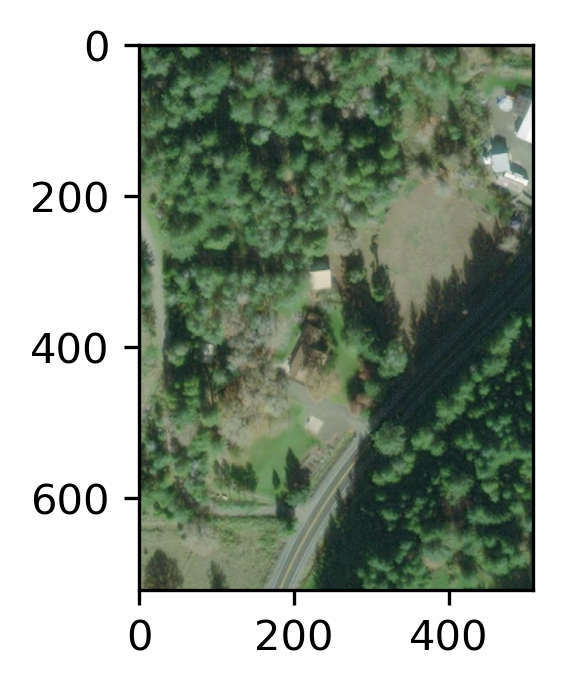

In [9]:
## Request and Render Aerial Imagery

# Thanks to ImportanceOfBeingErnest at https://stackoverflow.com/a/46429975/706797

#import urllib.request

layer_id = 3

pixel_ratio = 1
width = int(property_specs['width']*pixel_ratio)
height = int(property_specs['height']*pixel_ratio)


aerial_endpoint = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export"
aerial_default_qs = "?F=image&FORMAT=PNG32&TRANSPARENT=true&BBOXSR=3857&IMAGESR=3857"
aerial_layers_qs = "&layers=show%3A{0}".format(layer_id)
aerial_size_qs = "&SIZE={0}%2C{1}".format(width, height)
aerial_bbox_qs = "&BBOX={0}%2C{1}%2C{2}%2C{3}".format(xmin, ymin, xmax, ymax)
aerial_res_qs = "&DPI=%s" % dpi

request_url = ''.join([aerial_endpoint, aerial_default_qs, aerial_layers_qs, aerial_size_qs, aerial_bbox_qs, aerial_res_qs])
print(request_url)
response = requests.get(request_url)
aerial_image_bytes = BytesIO(response.content)
aerial_image = Image.open(aerial_image_bytes)

property_figure, property_axes = plt.subplots(figsize=(img_width, img_height), dpi=dpi)

property_axes.imshow(aerial_image, aspect="auto")

In [3]:
## create the patch collection

# See lot.landmapper.map_layers.views.render_vectors

polys = []

for coord_set in property_specs['geometry'].coords:
    for poly_coords in coord_set:
        poly = shapely.geometry.Polygon(poly_coords)
        patch = patches.Polygon(np.array(poly.exterior.xy).T)
        polys.append(patch)
        
# property_axes.add_collection(PatchCollection(polys, **patch_kwargs))

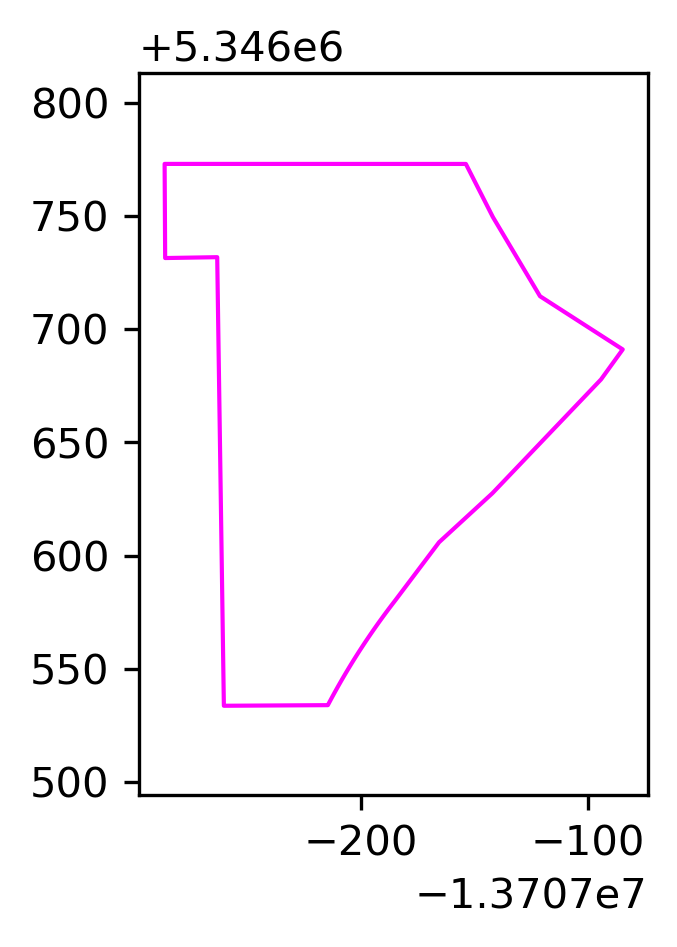

In [4]:
# prove that the patch collection are created correctly
property_figure = plt.figure(figsize=(img_width, img_height), dpi=dpi)
property_axes = property_figure.add_axes([0.0,0.0,1.0,1.0])
property_axes.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
# property_axes.axis('off')
property_axes.add_collection(PatchCollection(polys, **patch_kwargs))


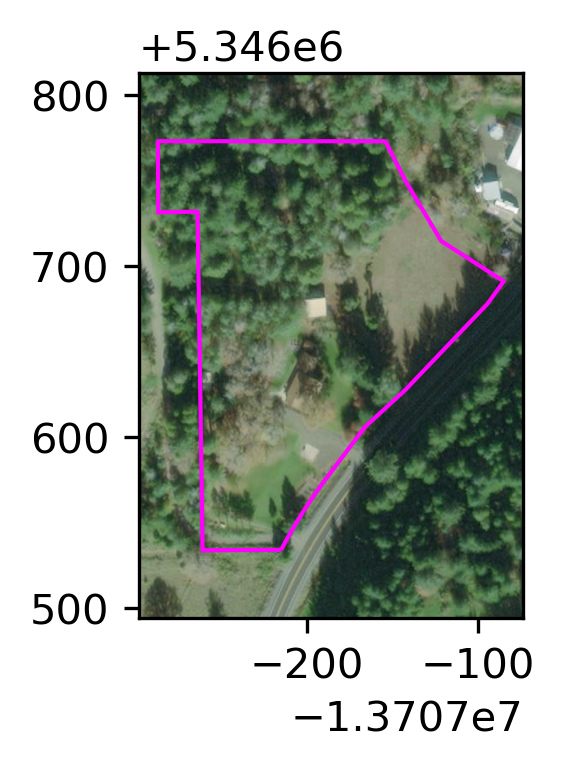

In [12]:
# pseudo code from D. Diaz

# get six-member vector that allows rasterio to transform things:
bbox = [xmin, ymin, xmax, ymax]
trf = transform.from_bounds(*bbox, width=img_width*dpi, height=img_height*dpi)

feature_obj = {
    "id": "0",
    "type": "Feature",
    "properties": {"col1": "name1"},
    "geometry": json.loads(geom_string),
    "bbox": (xmin, ymin, xmax, ymax)
}

feature_coll = {
    "type": "FeatureCollection",
    "features": [feature_obj,],
    "bbox": (xmin, ymin, xmax, ymax)
}

gdf = gpd.GeoDataFrame.from_features(feature_coll)

fig, ax = plt.subplots(figsize=(img_width,img_height), dpi=dpi, frameon=False)

work = show(reshape_as_raster(aerial_image), ax=ax, transform=trf)

# call show again to keep stacking
work = gdf.plot(ax=ax, lw=1, ec='#FF00FF', fc='none')

Width: 509
Height: 722


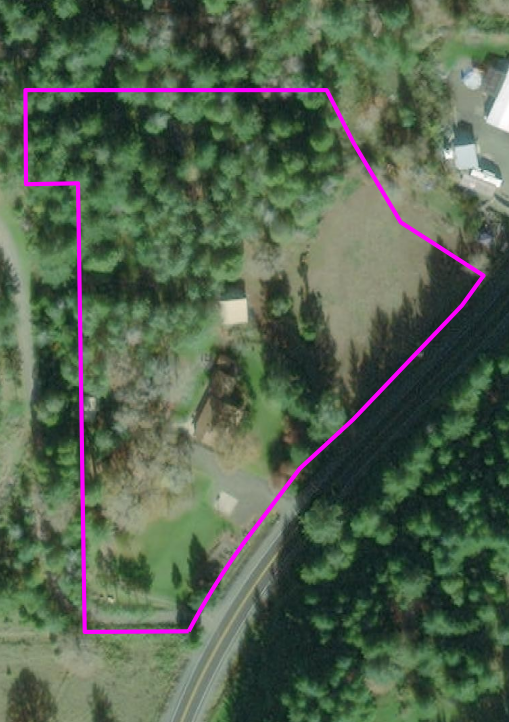

In [19]:
# From https://web-backend.icare.univ-lille.fr/tutorials/convert_a_matplotlib_figure
def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.frombuffer ( fig.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll ( buf, 3, axis = 2 )
    return buf

def fig2img ( fig ):
    """
    @brief Convert a Matplotlib figure to a PIL Image in RGBA format and return it
    @param fig a matplotlib figure
    @return a Python Imaging Library ( PIL ) image
    """
    # put the figure pixmap into a numpy array
    buf = fig2data ( fig )
    w, h, d = buf.shape
    return Image.frombytes( "RGBA", ( w ,h ), buf.tostring( ) )

# ax.axis('off')
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)

result_img = fig2img ( fig )
res_width, res_height = result_img.size
print("Width: %s" % res_width)
print("Height: %s" % res_height)
display(result_img)